In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pickle

import numpy as np

In [2]:
def load_from(file):
    with open(file, 'rb') as f:
        return pickle.load(f)

In [3]:
from typing import List


class RegressionResult:
    """
    Data class to store results from regression for a given model.
    """

    def __init__(self, name: str, mae: List[float]):
        """
        Parameters
        ----------
        - `name`: name of the model;
        - `mae`: list of the MAEs per epoch.
        """
        self.name = name
        self.mae = mae

In [4]:
cora_results = load_from('./experiments/cora_results.pkl')
hetero_results = load_from('./experiments/hetero_results.pkl')

qm0 = load_from('./experiments/qm_0_results_run0.pkl')
qm0_second = load_from('./experiments/qm_0_results_run1.pkl')
qm1 = load_from('./experiments/qm_1_results.pkl')
qm5 = load_from('./experiments/qm_5_results.pkl')
qm7 = load_from('./experiments/qm_7_results.pkl')

# LP plotting

In [66]:
from typing import Dict, Iterable

def plot_lp(data: Dict[str, Dict[float, Iterable[float]]], file_name: str, fl):
    i = 0
    fig1, axs = plt.subplots()
    cols = ['C0', 'C1', 'C2']
    for name, vals in data.items():
        for alpha, v in vals.items():
            if fl(alpha):
                axs.plot(np.arange(1, len(v) + 1), v, '-' if name != 'LP' else ':', label=f'{name} ({alpha})', color=cols[i])
                i = (i + 1) % len(cols)
    axs.set_xlabel('Layers')
    axs.set_ylabel('Accuracy')
    axs.grid(axis='x', color='0.8')
    axs.grid(axis='y', color='0.8')
    plt.legend()
    plt.plot()
    plt.savefig(f'./out/{file_name}.pdf', transparent=True)

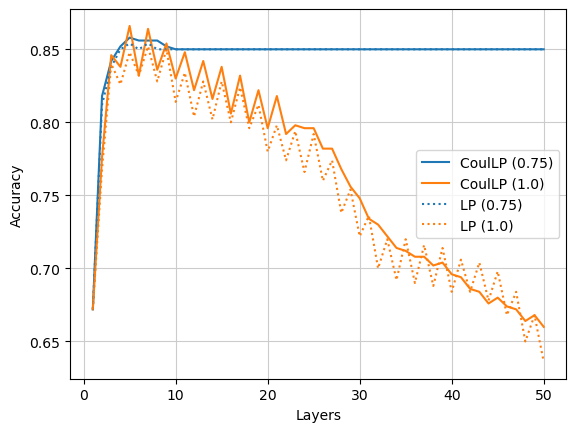

In [60]:
plot_lp(cora_results, 'cora', lambda x: x >= 0.75)

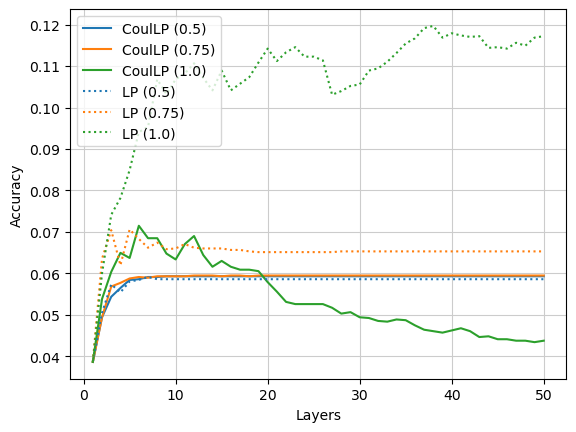

In [70]:
plot_lp(hetero_results, 'hetero', lambda x: x >= 0.5)

In [80]:
print(max([x - y for x, y in zip(cora_results['CoulLP'][0.75], cora_results['LP'][0.75])]))

0.006000041961669922


# NN Plotting

In [6]:
from typing import Dict


def plot_regression(data: Dict[str, RegressionResult], file_name: str):
    x = np.arange(1, 51)
    for name, result in data.items():
        plt.plot(x, result.mae, label=name)

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(axis='x', color='0.8')
    plt.grid(axis='y', color='0.8')
    plt.legend()
    plt.plot()
    plt.savefig(f'./out/{file_name}.pdf', transparent=True)

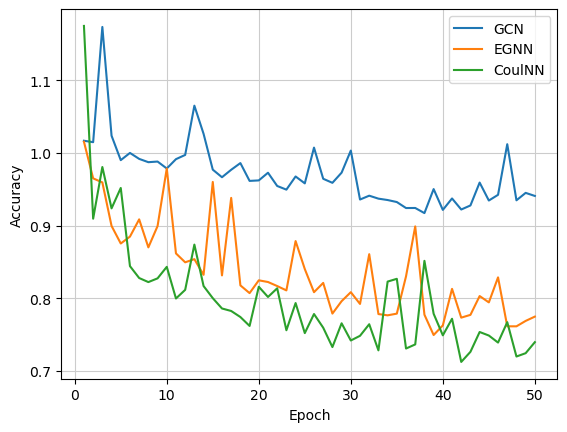

In [24]:
# QM0 plot
plot_regression(qm0, 'qm0')

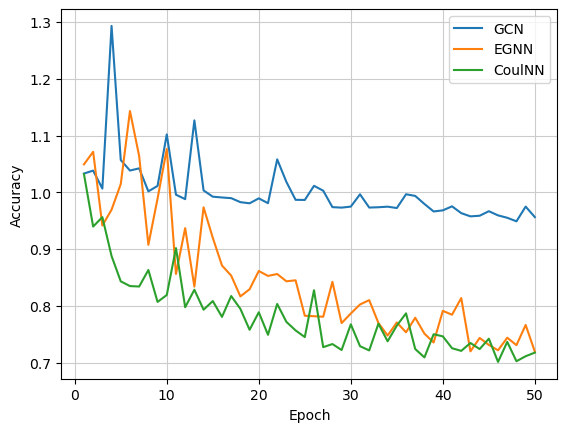

In [25]:
plot_regression(qm0_second, 'qm0_bis')

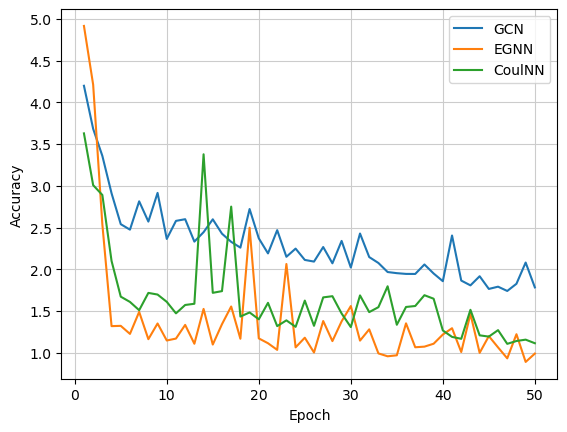

In [20]:
# QM1
plot_regression(qm1, 'qm1')

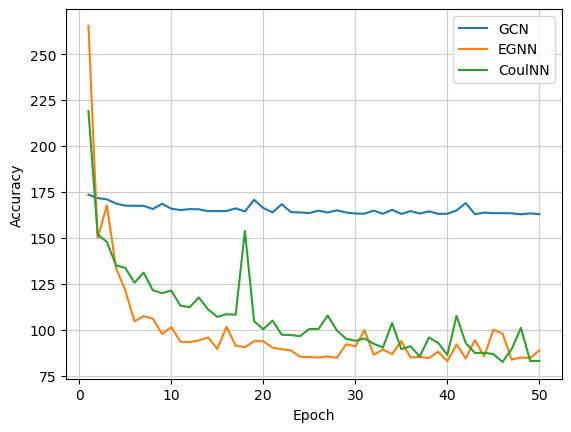

In [21]:
# QM5
plot_regression(qm5, 'qm5')

GCN
[1.024891792721088, 1.026496084512246, 1.0898976689993753, 1.158370002439827, 1.0234872242870576, 1.0191553893502006, 1.0169874415622164, 0.9944592740260276, 0.999690725530798, 1.0402711814116694, 0.9935990738900431, 0.9926026768355872, 1.0958171510546475, 1.014757125140063, 0.9846298447070867, 0.9787133043450347, 0.983244084431492, 0.984332593056518, 0.9710573252651813, 0.9757609066079531, 0.976752832324084, 1.0062686143662096, 0.9838877032502451, 0.9771689542702953, 0.9723134898427206, 1.0093471956649038, 0.9836404641448495, 0.9663661430653454, 0.9729343082773525, 0.9890171192633879, 0.9661847354831747, 0.9571400688250662, 0.9553888361006891, 0.9549397870478953, 0.9523544717962431, 0.9603682287931827, 0.9589437070747715, 0.9483347768904864, 0.9582365599239313, 0.9449191564279709, 0.9563212132949863, 0.9427156768397421, 0.9426828822565398, 0.9589593953003299, 0.9506058565485933, 0.9508490583007205, 0.9835699995006371, 0.9418525757817869, 0.9599170839845159, 0.9485512236010823]
EGN

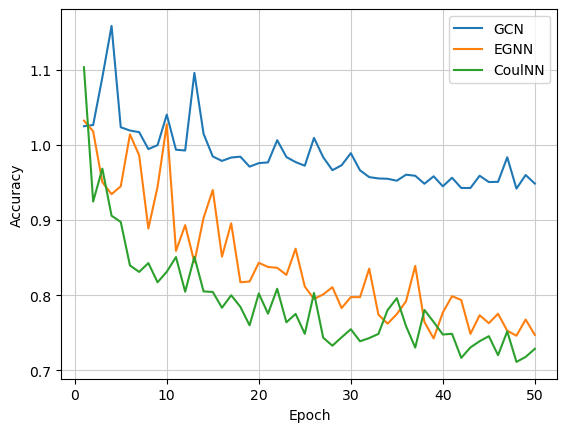

In [41]:
def smooth_runs(runs: List[Dict[str, RegressionResult]], it: int=50):
    def mean_ls(ls: List[float]) -> float:
        return sum(ls) / len(ls)
    ret = {}  # name -> MAEs
    keys = set.intersection(*[set(d.keys()) for d in runs])
    for key in keys:
        print(key)
        ret[key] = RegressionResult(key, [mean_ls([run[key].mae[i] for run in runs]) for i in range(it)])
        print(ret[key].mae)
    print()
    return ret

plot_regression(smooth_runs([qm0, qm0_second]), 'smooth_q0')

In [14]:
print(min(qm0['CoulNN'].mae))
print(min(qm0['EGNN'].mae))

0.7125568827496299
0.749554840824272
